In [1]:
folder_path = "/Users/prasannamayil/Documents/datasets/DomainNet/clipart/flower/"


Use arrow keys to navigate. Press Enter to save annotations.
Left click: Unnatural, Right click: Ambiguous


 >


AttributeError: 'numpy.ndarray' object has no attribute 'clear'

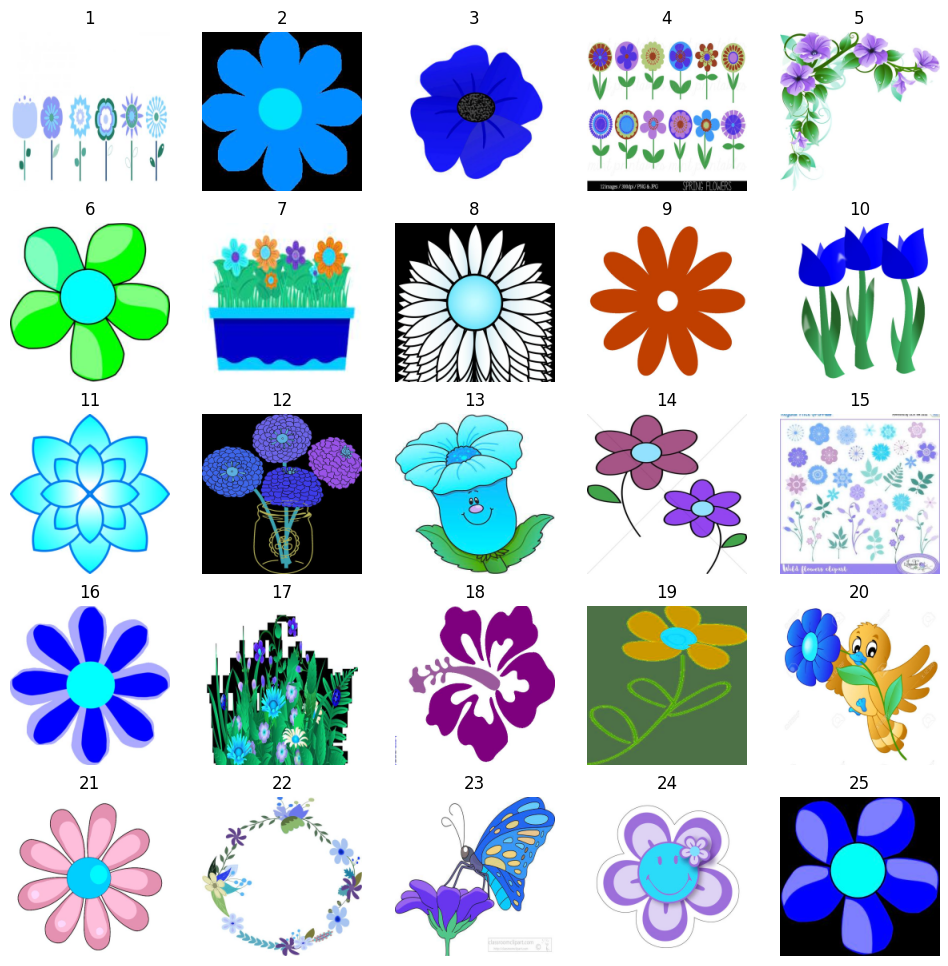

In [4]:
from IPython.display import Image, display
import cv2
from math import ceil
import os
import matplotlib.pyplot as plt

# Initialize empty arrays
natural = []
unnatural = []
ambiguous = []

# Define image folder path
#folder_path = "path/to/your/images/"

# Define image size
image_size = (200, 200)

# Function to display images in grid format
def display_grid(images, rows, cols, figsize=(12, 12)):
  fig, axs = plt.subplots(rows, cols, figsize=figsize)
  axs = axs.flatten()
  for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].set_title(f"{i+1}")
    axs[i].axis('off')
    axs[i].set_aspect('equal')

# Function to handle click events
def on_click(event):
  if event.xdata is not None and event.ydata is not None:
    clicked_index = int(event.xdata // image_size[0]) + int(event.ydata // image_size[1]) * 5
    if event.button == 1:  # Left click
      axs[clicked_index].set_aspect('equal')
      axs[clicked_index].patch.set_facecolor('green')
      unnatural.append(folder_path + images[clicked_index].split("/")[-1])
    elif event.button == 3:  # Right click
      axs[clicked_index].set_aspect('equal')
      axs[clicked_index].patch.set_facecolor('red')
      ambiguous.append(folder_path + images[clicked_index].split("/")[-1])

# Load first 25 images
images = []
for filename in os.listdir(folder_path)[:25]:
  img = cv2.imread(os.path.join(folder_path, filename))
  img = cv2.resize(img, image_size, interpolation=cv2.INTER_AREA)  # Use cv2.resize with interpolation
  images.append(img)

# Display images in grid
fig, axs = plt.subplots(5, 5, figsize=(12, 12))
axs = axs.flatten()
for i, img in enumerate(images):
  axs[i].imshow(img)
  axs[i].set_title(f"{i+1}")
  axs[i].axis('off')
  axs[i].set_aspect('equal')

# Connect click event
fig.canvas.mpl_connect('button_press_event', on_click)

# Display controls
print("Use arrow keys to navigate. Press Enter to save annotations.")
print("Left click: Unnatural, Right click: Ambiguous")

# Loop through image sets
current_page = 0
while True:
  # Get user input
  key = input("")
  if key == '\n':
    # Save annotations
    print(f"Natural: {natural}")
    print(f"Unnatural: {unnatural}")
    print(f"Ambiguous: {ambiguous}")
    break
  elif key == '<':
    # Display previous image set
    if current_page > 0:
      current_page -= 1
      images.clear()
      axs.clear()
      for filename in os.listdir(folder_path)[current_page * 25: (current_page + 1) * 25]:
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.resize(img, image_size, interpolation=cv2.INTER_AREA)
        images.append(img)
      display_grid(images, 5, 5)
  elif key == '>':
    # Display next image set
    if len(os.listdir(folder_path)) > (current_page + 1) * 25:
      current_page += 1
      images.clear()
      axs.clear()
      for filename in os.listdir(folder_path)[current_page * 25: (current_page + 1) * 25]:
        img = cv2.imread(os.path.join(folder_path, filename))
        img = cv2.resize(img, image_size, interpolation=cv2.INTER_AREA)
        images.append(img)
      display_grid(images, 5, 5)


In [18]:
natural

[]